# COVID-19 
## ANALISI DIFFUSIONE
### Dataset curato da Our World in Data
Analisi curata da Gallino Doriana Grace

In [1]:
#Importo il dataset e la libreria Pandas. 
#Analizziamo il dataset nella sua dimensione e i suoi metadati effettuando un EDA.

import pandas as pd 
covid = pd.read_csv('owid-covid-data.csv') #Il nome al mio dataframe sarà 'covid'.

print("Numero di righe e colonne:", covid.shape) #Quanto è grande il dataset.

#Stampo le prime righe del dataset e studio i metadati.
covid.head()
#Comando per analizzare i tipi di dato per ciascuna colonna.
covid.dtypes
#Informazioni generali del dataset.
covid.info()

Numero di righe e colonne: (429435, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed           

### Pulizia e attenzione a dati aggregati

Il dataset include righe con dati **aggregati**, che non rappresentano singoli paesi ma entità più ampie come:
- `"World"`
- `"Asia"`, `"Europe"`, `"Africa"`, ecc.
- Codici ISO come `"OWID_WRL"`, `"OWID_EUR"`, `"OWID_AFR"` (non sono paesi reali)

### Differenza tra `new_cases` e `total_cases`

Nel dataset, le colonne `new_cases` e `total_cases` rappresentano due indicatori diversi e vanno interpretate e utilizzate in modo distinto:

- **`new_cases`** indica il numero di nuovi casi segnalati ogni giorno.
    Questa colonna è utile per analizzare:
  - l’andamento giornaliero dell’epidemia,
  - picchi o ondate di contagi,
  - il confronto tra giorni o periodi,
  - l’effetto immediato di politiche sanitarie o misure restrittive.

- **`total_cases`** rappresenta il numero cumulativo di casi registrati fino a una certa data.
    Serve a:
  - valutare il peso complessivo dell’epidemia in una regione o paese,
  - fare confronti storici o tra territori,
  - calcolare proporzioni come l'incidenza sulla popolazione.

**È importante non confondere le due colonne**: usare `new_cases` per un'analisi cumulativa o `total_cases` per un'analisi giornaliera può portare a risultati fuorvianti.

In [2]:
#PUNTO 2:Per scoprire quanti casi totali nel mondo
total_continent_cases = covid.groupby (['continent', 'location'])['total_cases'].max().groupby('continent').sum()
total_global_cases = covid['total_cases'].max() 
print ('I casi totali nel mondo sono stati:', total_global_cases)

I casi totali nel mondo sono stati: 775866783.0


In [3]:
#PUNTO 2: Quanti casi suddiviso per continente
total_continent_cases = covid.groupby (['continent', 'location'])['total_cases'].max().groupby('continent').sum()
total_global_cases = covid['total_cases'].max()
for continent, cases in total_continent_cases.items():
    print (f'Continent: {continent}, Total cases: {cases}')

Continent: Africa, Total cases: 13145540.0
Continent: Asia, Total cases: 301532347.0
Continent: Europe, Total cases: 252916868.0
Continent: North America, Total cases: 124492666.0
Continent: Oceania, Total cases: 15003352.0
Continent: South America, Total cases: 68809418.0


In [4]:
#PUNTO 2: Calcolo la percentuale rispetto al totale mondiale del numero dei casi
print("Percentuale dei casi totali per continente:\n")
for continent, cases in total_continent_cases.items():
    percentage = (cases / total_global_cases) * 100
    print(f"{continent}: {percentage:.2f}%")

Percentuale dei casi totali per continente:

Africa: 1.69%
Asia: 38.86%
Europe: 32.60%
North America: 16.05%
Oceania: 1.93%
South America: 8.87%


In [5]:
#PUNTO 3: selezionare i dati relativi all'Italia nell'anno 2022.
covid['date'] = pd.to_datetime(covid['date']) #Mi assicuro che la colonna date sia nel formato corretto

#Applico il filtro per l'Italia e per l'anno 2022
italy_2022 = covid[(covid['location'] == 'Italy') & 
                   (covid['date'].dt.year == 2022)]

#Tengo solo i giorni con valore valido in 'new_cases' e voglio escludere i valori Null.
italy_2022_weekly = italy_2022[italy_2022['new_cases'].notna() & (italy_2022['new_cases'] > 0)]
italy_2022_weekly = italy_2022_weekly.sort_values('date')
italy_2022_weekly.head() #Visualizzo il risultato.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.30,12.99,8.06,2849.4834
186010,ITA,Europe,Italy,2022-01-09,7281297.0,1014262.0,144894.571,138881.0,1368.0,195.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168831.80,12.89,3.94,2859.7395
186017,ITA,Europe,Italy,2022-01-16,8549450.0,1268153.0,181164.714,140856.0,1975.0,282.143,...,27.8,NaN,3.18,83.51,0.892,59037472,170089.10,12.83,8.03,2881.0361
186024,ITA,Europe,Italy,2022-01-23,9781191.0,1231741.0,175963.000,143296.0,2440.0,348.571,...,27.8,NaN,3.18,83.51,0.892,59037472,171694.19,12.80,10.40,2908.2239
186031,ITA,Europe,Italy,2022-01-30,10821375.0,1040184.0,148597.714,145914.0,2618.0,374.000,...,27.8,NaN,3.18,83.51,0.892,59037472,174151.69,12.84,16.50,2949.8500


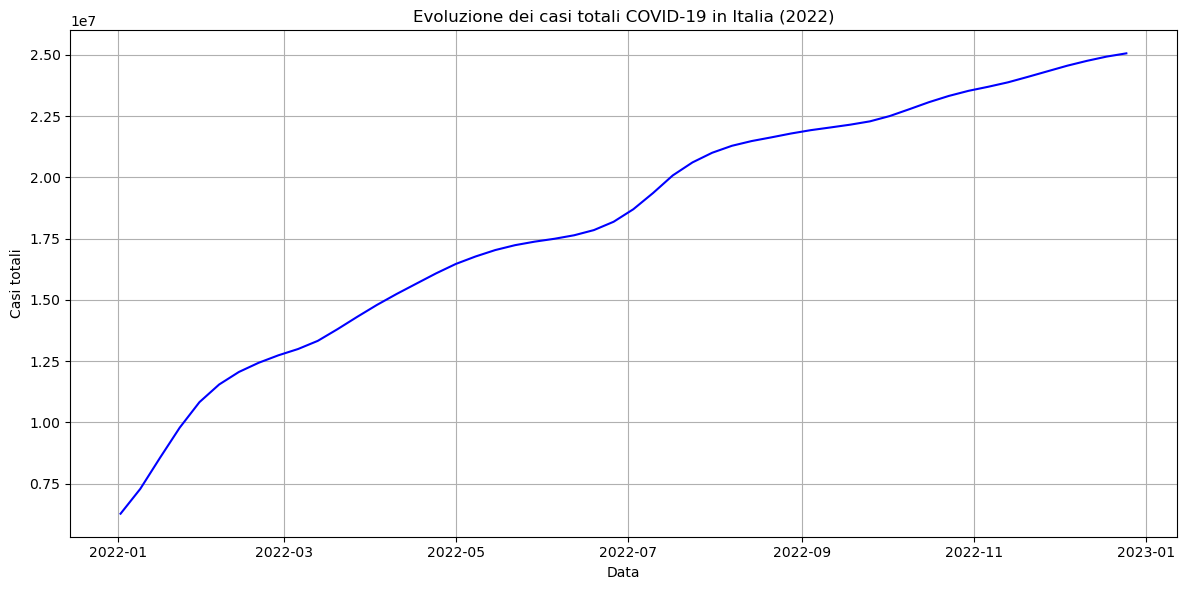

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(italy_2022_weekly['date'], italy_2022_weekly['total_cases'], color='blue')
plt.title("Evoluzione dei casi totali COVID-19 in Italia (2022)")
plt.xlabel("Data")
plt.ylabel("Casi totali")
plt.grid(True)
plt.tight_layout()
plt.show()

## Evoluzione dei casi totali in Italia nel 2022

Nel grafico precedente viene mostrata la crescita cumulativa dei casi totali di COVID-19 in Italia durante l'anno 2022. La curva evidenzia l'andamento complessivo della pandemia su base giornaliera.

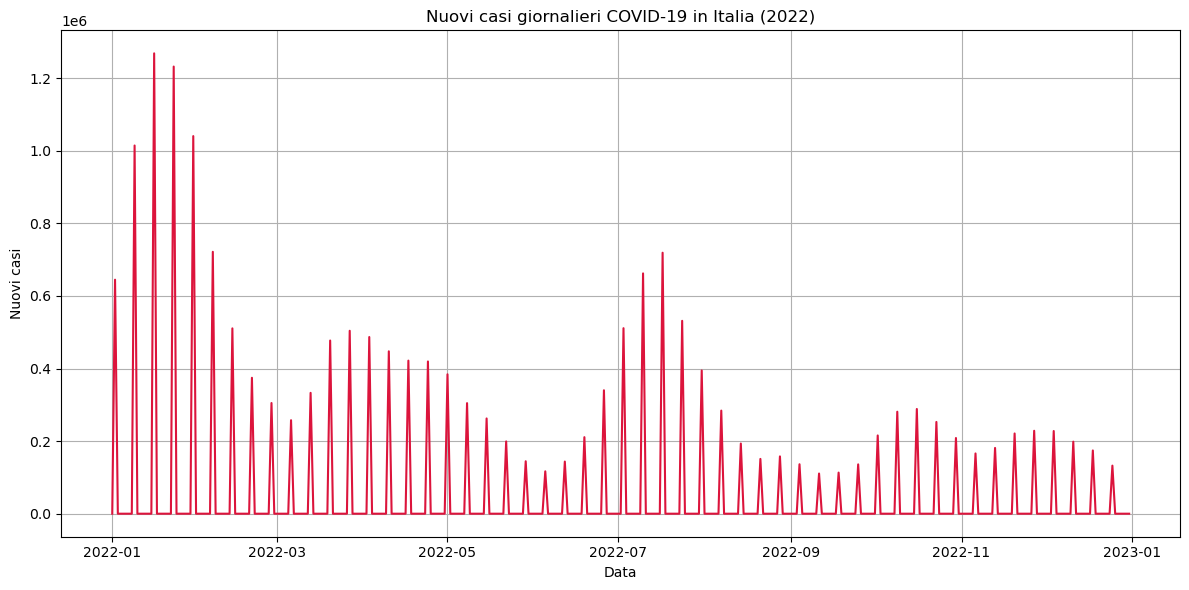

In [7]:
#PUNTO 3: numero di nuovi casi rispetto alla data

plt.figure(figsize=(12, 6))
plt.plot(italy_2022['date'], italy_2022['new_cases'], color='crimson')
plt.title("Nuovi casi giornalieri COVID-19 in Italia (2022)")
plt.xlabel("Data")
plt.ylabel("Nuovi casi")
plt.grid(True)
plt.tight_layout()
plt.show()

## Nuovi casi COVID-19 giornalieri in Italia - 2022

Il grafico precedente mostra l’andamento dei nuovi casi giornalieri in Italia nel corso del 2022. I dati rappresentano il numero di casi registrati ogni giorno, e permettono di individuare eventuali picchi o periodi di diminuzione del contagio.

In [8]:
#PUNTO 4: Prendo in considerazione: Italia, Germania e Francia.
#Mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)

countries = ['Italy', 'Germany', 'France'] #Mi prendo le nazioni che voglio considerare

start_date = '2022-05-01' #Applico un filtro per date tra maggio 2022 e aprile 2023 (inclusi)
end_date = '2023-04-30'

#Filtro completo con nazioni e date
icu_data = covid[
    (covid['location'].isin(countries)) &
    (covid['date'] >= start_date) &
    (covid['date'] <= end_date)
]

#Escludo valori mancanti in 'icu_patients'
icu_data = icu_data[icu_data['icu_patients'].notna()]

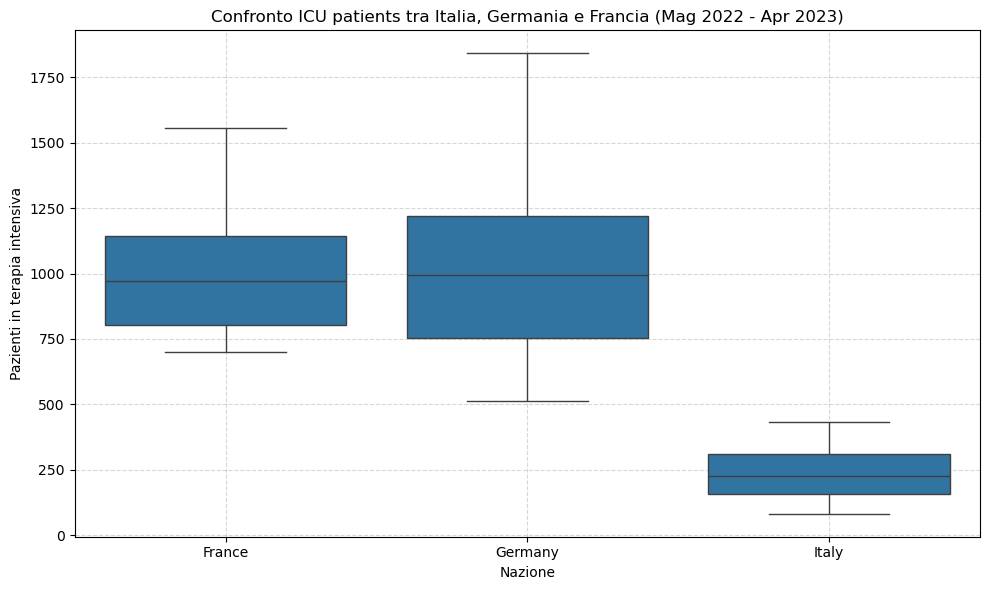

In [9]:
#Ora creo un boxplot.

import seaborn as sns #importo anche seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=icu_data, x='location', y='icu_patients')
plt.title("Confronto ICU patients tra Italia, Germania e Francia (Mag 2022 - Apr 2023)")
plt.xlabel("Nazione")
plt.ylabel("Pazienti in terapia intensiva")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Confronto tra Italia, Germania e Francia - Pazienti in Terapia Intensiva

Il boxplot precedente mostra la distribuzione del numero di pazienti in terapia intensiva (`icu_patients`) per le nazioni Italia, Germania e Francia, nel periodo compreso tra maggio 2022 e aprile 2023.

Sono stati considerati solo i giorni in cui era disponibile una misurazione (`NaN` esclusi). Il boxplot evidenzia la variabilità interna e i possibili outlier per ciascun paese.

### Commento sui dati del boxplot

Dal boxplot si osserva una chiara differenza nella pressione sulle terapie intensive tra i tre paesi:

- **Italia** ha avuto valori sensibilmente più bassi di pazienti in terapia intensiva rispetto a Francia e Germania nel periodo considerato. La mediana è molto inferiore e la variabilità ridotta.
- **Francia** e **Germania** mostrano distribuzioni simili in termini di mediana, ma **la Germania** presenta una maggiore variabilità e valori massimi più elevati, segnalando episodi con picchi di occupazione più alti.
- Entrambi questi paesi mostrano una distribuzione ampia, con possibili outlier in alto, che indicano giornate con numeri particolarmente alti di pazienti in terapia intensiva.

In sintesi, la situazione in Italia appare più contenuta rispetto agli altri due paesi europei, almeno per quanto riguarda il numero di ricoverati in ICU da maggio 2022 ad aprile 2023.

Totale pazienti ospedalizzati nel 2021:
France: 6,008,717
Germany: 0
Italy: 4,419,950
Spain: 2,411,706


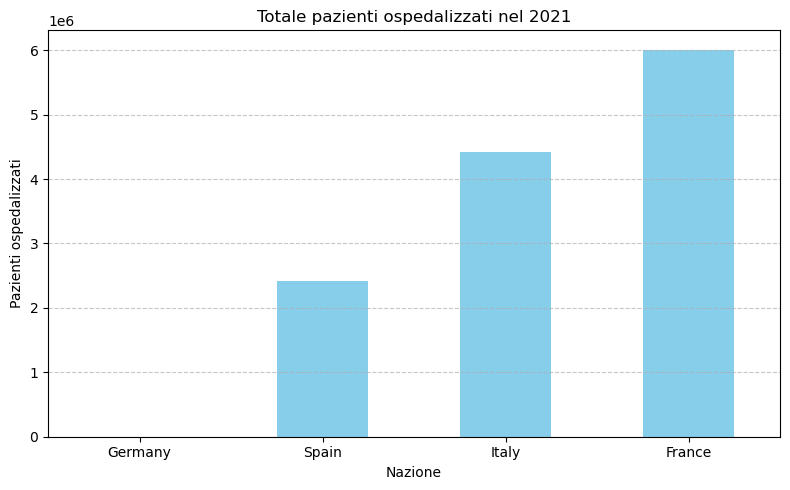

In [10]:
#PUNTO 5: Considerazione su nazioni di Italia, Germania, Francia e Spagna in tutto il 2021.
#Visualizzazione sia grafica che numerica

#Innanzitutto applico il filtro per le nazioni interessate nell'anno 2021 come richiesto.
countries = ['Italy', 'Germany', 'France', 'Spain']
hosp_2021 = covid[
    (covid['location'].isin(countries)) & 
    (covid['date'].dt.year == 2021)
]

#Sommo i pazienti ospedalizzati per nazione ed elimino i null
hosp_totals = hosp_2021.groupby('location')['hosp_patients'].sum().dropna()

#Dimostrazione numerica
print("Totale pazienti ospedalizzati nel 2021:")
for country, total in hosp_totals.items():
    print(f"{country}: {int(total):,}")

#Dimostrazione grafica tramite un grafico a barre
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
hosp_totals.sort_values().plot(kind='bar', color='skyblue')
plt.title("Totale pazienti ospedalizzati nel 2021")
plt.ylabel("Pazienti ospedalizzati")
plt.xlabel("Nazione")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Totale pazienti ospedalizzati nel 2021 e gestione valori null

Il grafico mostra la somma dei pazienti ospedalizzati per COVID-19 nel corso del 2021 nei quattro paesi europei selezionati (Italia, Germania, Francia, Spagna). I dati provengono dalla colonna `hosp_patients` e rappresentano la somma dei pazienti conteggiati giorno per giorno nell'arco dell'anno.

In questo caso mancano completamente i dati in riferimento alla Germania, su Github esiste un file dedicato agli ospedalizzati di quest'ultima e per effettuare un'analisi completa sarebbe stato corretto, e opportuno, importare quel file ed eseguire un merge utilizzando una colonna comune e ottenere così i dati mancanti. 

In generale la gestione dei valori nulli hanno diverse metodiche di ragionamento a seconda della necessità di informazione che si vuole ottenere.

Nel dataset utilizzato sono presenti diverse colonne con valori nulli (`NaN`), che rappresentano dati mancanti o non rilevati. Come anticipato, esistono varie modalità per gestirli, a seconda del tipo di analisi da svolgere:

- **Eliminazione dei valori nulli**: si possono rimuovere righe o colonne con `NaN` tramite `dropna()`, utile se la mancanza di dati è limitata e non influisce sul risultato.

- **Sostituzione (imputazione)**: si possono riempire i `NaN` con valori significativi come la **media**, **mediana**, **zero**, o il valore precedente tramite `fillna()` o metodi come `ffill()` (forward fill) e `bfill()` (backward fill).

- **Filtro selettivo**: si possono considerare solo le righe che hanno dati validi in una o più colonne chiave, escludendo le altre.

- **Interpolazione**: in caso di serie temporali, è possibile stimare i valori mancanti con metodi di interpolazione (`interpolate()`), utile ad esempio per mantenere la continuità nei grafici.

La scelta del metodo dipende dal contesto e dalla sensibilità dell'analisi alla qualità dei dati.